In [1]:
%pip install pandas numpy seaborn matplotlib yfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 11.9 MB/s eta 0:00:01
   ----------------- ------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [3]:
# Step 1: Fetch Real-Life Data
ticker = "RELIANCE.NS"
df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)

C:\Users\comp\AppData\Local\Temp\ipykernel_10396\27427927.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2025-07-31", progress=False)


In [4]:
# Step 2: Data Cleaning
print("Q1: Are there any missing values in the dataset?")
print("Missing Values:\n", df.isnull().sum())
df = df.dropna()
df.index = pd.to_datetime(df.index)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

Q1: Are there any missing values in the dataset?
Missing Values:
 Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64


In [6]:
# Step 3: Calculate Key Metrics
df['Daily_Return'] = df['Close'].pct_change() * 100
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)
# Relative Strength Index (RSI)
def calculate_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))
df['RSI'] = calculate_rsi(df['Close'])
# Bollinger Bands
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']

# Set seaborn style
sns.set(style='whitegrid')

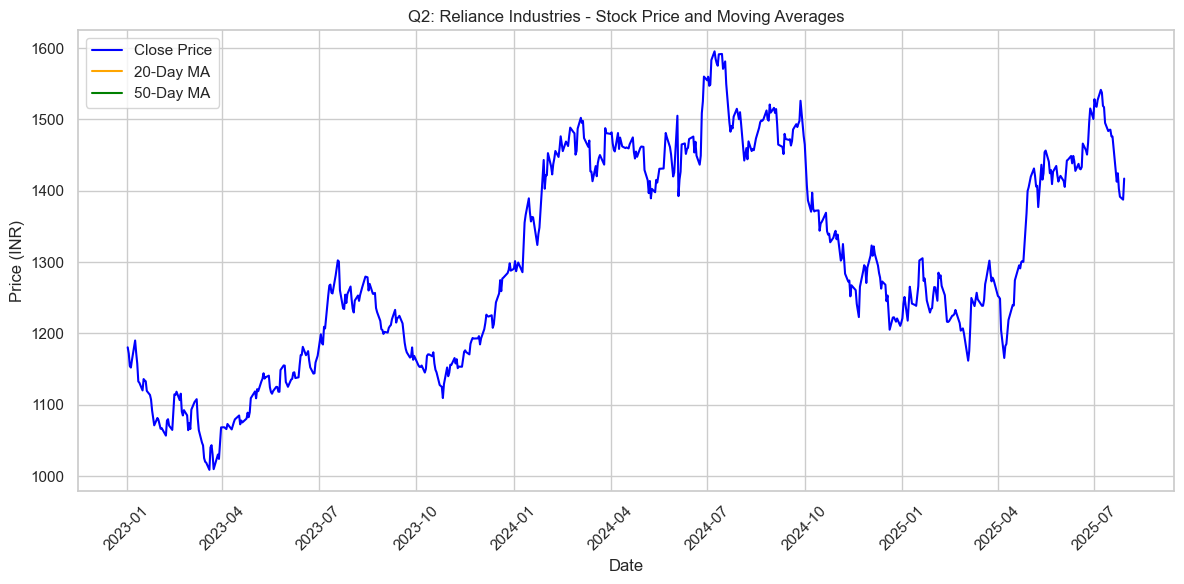

In [8]:
# Q2: What is the trend of the stock price over time?
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day MA', color='orange')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='green')
plt.title('Q2: Reliance Industries - Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('q2_price_ma.png')
plt.show()
plt.close()

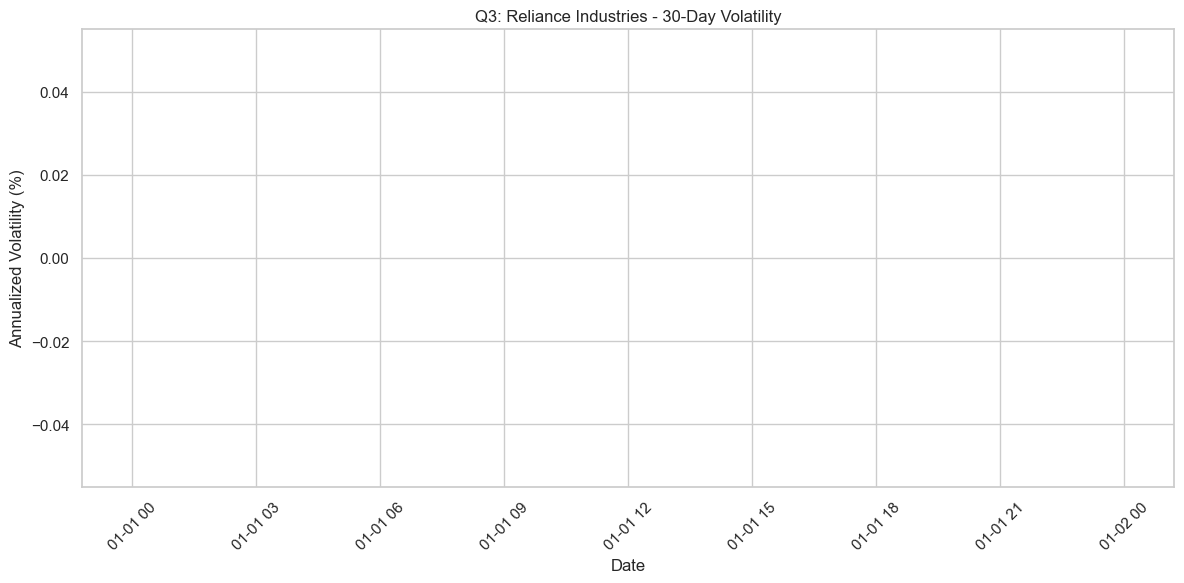

In [10]:
# Q3: How volatile is the stock?
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], color='red')
plt.title('Q3: Reliance Industries - 30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility (%)')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('q3_volatility.png')
plt.show()
plt.close()